In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

In [2]:
import scipy.optimize
import pandas as pd

## What does the following code do?

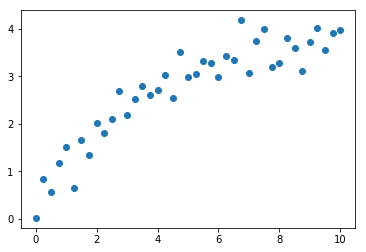

In [5]:
d = pd.read_csv("dataset_0.csv")
plt.plot(d.x,d.y,'o')

## What does the following code do?

In [7]:
def linear(x,a,b):
    return a + b*x

Defines a linear function of `x` with the slope `a` and the intercept `b`.

## What does the following code do?
+ What is the `param` business?
+ What is the `y` bit?

In [ ]:
def linear(x,a,b):
    return a + b*x

def linear_r(param,x,y):
    return linear(x,param[0],param[1]) - y

+ Defines a *residuals* function for `linear` that compares the output of `linear` to whatever's in `y`.  
+ `params` holds `a` and `b` in a list.

## What does the following code do?

In [12]:
def linear_r(param,x,y):                     # copied from previous cell
    return linear(x,param[0],param[1]) - y   # copied from previous cell

param_guesses = [1,1]
fit = scipy.optimize.least_squares(linear_r,param_guesses,
                                   args=(d.x,d.y))
fit_a = fit.x[0]
fit_b = fit.x[1]
sum_of_square_residuals = fit.cost

+ Uses `least_squares` regression to find values of `a` and `b` that minimize `linear_r` given `d.x` and `d.y`.  
+ The fit parameters end up in `fit_a` and `fit_b`
+ The $SSR$ is stored in `sum_of_square_residuals`

## What does the following code do?
+ What the heck is `linspace`?
+ What are we plotting?

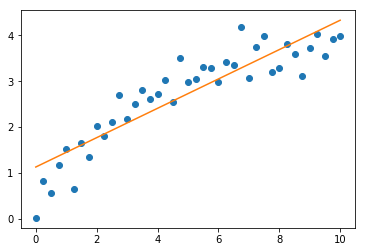

In [17]:
x_range = np.linspace(np.min(d.x),np.max(d.x),100)

plt.plot(d.x,d.y,"o")
plt.plot(x_range,linear(x_range,fit_a,fit_b))


## Put together

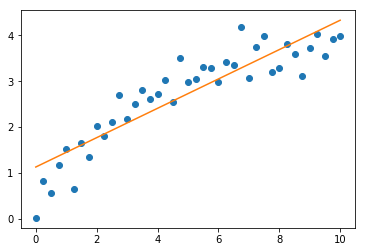

In [18]:
def linear(x,a,b):
    """Linear model of x using a (slope) and b (intercept)"""
    return a + b*x

def linear_r(param,x,y):
    """Residuals function for linear"""
    return linear(x,param[0],param[1]) - y

# Read data
d = pd.read_csv("dataset_0.csv")
plt.plot(d.x,d.y,'o')

# Perform regression
param_guesses = [1,1]
fit = scipy.optimize.least_squares(linear_r,param_guesses,args=(d.x,d.y))
fit_a = fit.x[0]
fit_b = fit.x[1]
sum_of_square_residuals = fit.cost

# Plot result
x_range = np.linspace(np.min(d.x),np.max(d.x),100)
plt.plot(x_range,linear(x_range,fit_a,fit_b))


## We just sent out that code block and dataset_1.csv on slack now

<h4>For your assigned model:</h4>
<ul>
    <li>Write a function and residuals function</li>
    <li>Estimate the parameters of the model</li>
    <li>Plot the data and the model on the same graph</li>
    <li>Write the SSR and number of parameters on the board</li>
    <li>If you finish early: plot the residuals and decide if you like your model</li>
    <li>If you're still waiting: try to figure out which model best fits dataset_1.csv</li>
</ul>
<br/>

<div style="font-size:30px;" >
<div class="row">
    <div class="col-xs-6">$y = a \Big ( \frac{bx}{1 + bx} \Big )$</div>
    <div class="col-xs-6">$y = a \Big ( \frac{bx^{c}}{1 + bx^{c}} \Big )$</div>
</div>

<div class="row">
    <div class="col-xs-6">$y = a(1 - e^{-bx})$</div>
    <div class="col-xs-6">$y = a + bx^{2} + cx^{3}$</div>
</div>
<div class="row">
    <div class="col-xs-6">$y = a + bx^{2} + cx^{3} + dx^{4}$</div>
    <div class="col-xs-6">$y = asin(bx + c)$</div>
</div>
<div class="row">
    <div class="col-xs-6">$y = aln(x + b)$</div>
    <div class="col-xs-6">$y = aln(bx + c)$</div>
</div>




In [19]:
## Models

def lin(x,a=1,b=1):
    return a + b*x

def hb(x,a=1,b=1):
    return a*(b*x)/(1 + b*x)

def hbc(x,a=1,b=1,c=1):
    return a*(b*(x**c))/(1 + b*(x**c))

def expt(x,a=1,b=1):
    return a*(1 - np.exp(-b*x))

def second(x,a=1,b=1,c=1):
    return a + b*x + c*(x**2)

def third(x,a=1,b=1,c=1,d=1):
    return a + b*x + c*(x**2) + d*(x**3)

def trig(x,a=1,b=1,c=1):
    return a*np.sin(b*x + c)

def trig2(x,a=1,b=1,c=1,d=1):
    return a*np.sin(x*b) + c*np.sin(x*d)

def logd(x,a=1,b=1):
    
    return a*np.log(x + b)

def logdc(x,a=1,b=1,c=1):
    
    return a*np.log(x*b + c)

In [ ]:
### TEST FITTING

import inspect

def residuals(param,x,y,f):
    """A generalized residuals function."""
    return y - f(x,*param)

def fitter(x,y,f):
    """
    A generalized fitter.  Find parameters of `f` that minimize the 
    residual between `f` and `y` for values of `x`.  This function
    assumes that `f` has the form:
    
    f(x,param1,param2,param3...)
    
    x and y should be numpy arrays of the same length.
    """
    
    # Create a list of parameter names and guesses using `inspect`
    names = []
    guesses = []
    s = inspect.signature(f)
    for i, p in enumerate(s.parameters):
        names.append(s.parameters[p].name)
        guesses.append(s.parameters[p].default)
    
    # Fit the model to the data.
    x0 = np.array(guesses[1:])
    fit = scipy.optimize.least_squares(residuals,x0,
                                       args=(x,y,f))

    
    # Plot hte fit
    x_range = np.linspace(np.min(x),np.max(x),100)
    plt.plot(x_range,f(x_range,*fit.x),"-")
    
    # Calculate R^2
    ss_err = np.sum(residuals(fit.x,x,y,f)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    R_sq = 1 - (ss_err/ss_tot)
    
    return len(fit.x), np.sum(residuals(fit.x,x,y,f)**2)
    
# Load in dataset
d = pd.read_csv("dataset_0.csv")
plt.plot(d.x,d.y,"ko")

# Fit all of those functions to the data
func_list = [lin,hb,hbc,expt,second,third,trig,trig2,logd,logdc]
results = []
for f in func_list:
    results.append((str(f).split()[1],fitter(d.x,d.y,f)))
    print(results[-1])

    